In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [54]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [55]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [56]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [59]:
df['species_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

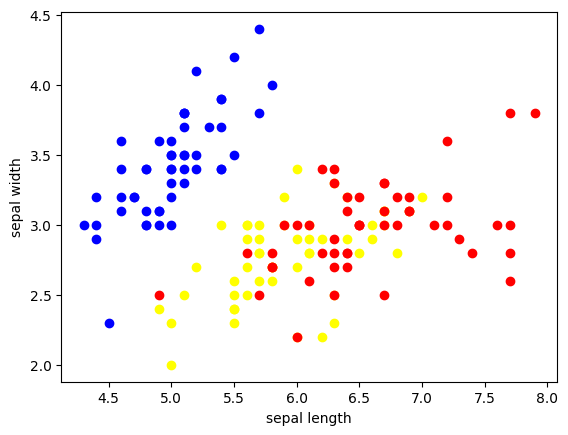

In [62]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='blue')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='yellow')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red')

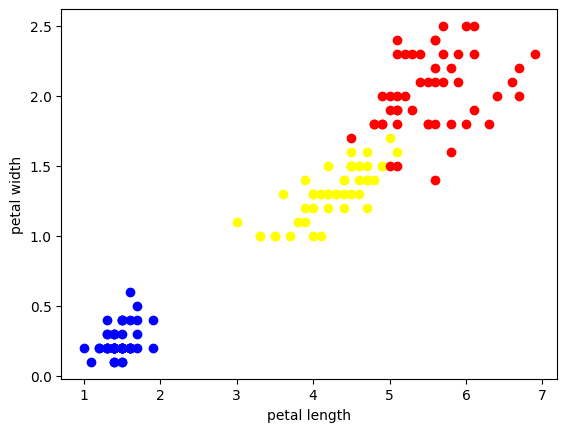

In [63]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='blue')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='yellow')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')

In [64]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','species_name'],axis='columns')
y=df.target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [66]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50000)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50000)

In [68]:
model.score(X_test,y_test)

0.9777777777777777

In [69]:
y_predicted=model.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[21,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 12]], dtype=int64)

Text(33.22222222222222, 0.5, 'truth')

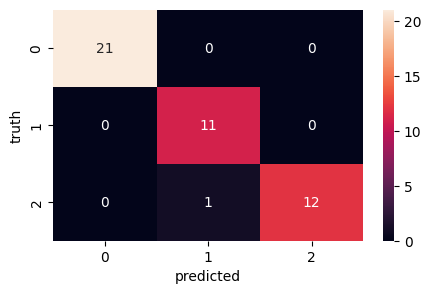

In [71]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

SVM

In [72]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [73]:
model.score(X_test,y_test)

0.9777777777777777

In [74]:
y_predicted=model.predict(X_test)

Text(33.22222222222222, 0.5, 'truth')

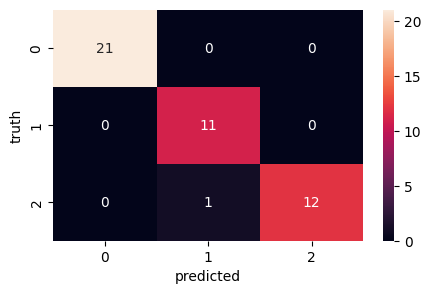

In [75]:
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

Cross Validation

In [76]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3)

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(max_iter=200),X,y,cv=kf)

array([0.98, 0.96, 0.98])

In [79]:
from sklearn.svm import SVC
cross_val_score(SVC(),X,y,cv=kf)

array([0.96, 0.98, 0.94])

In [80]:
cross_val_score(RandomForestClassifier(),X,y,cv=kf)

array([0.98, 0.94, 0.96])

KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [83]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
knn.score(X_test,y_test)

0.9777777777777777

In [87]:
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[21,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 12]], dtype=int64)

Text(58.222222222222214, 0.5, 'truth')

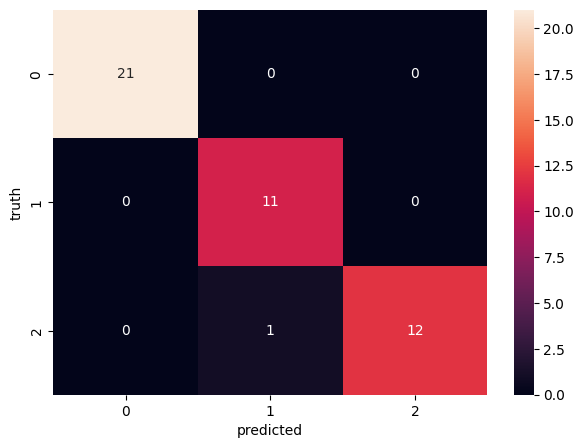

In [88]:
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.97      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

